# <font color='blue'>Projeto</font>
## <font color='blue'>Limpeza, Engenharia de Atributos e Análise Exploratória de Dados de Vendas com Pandas</font>

## 1. Definição do Problema de Negócio

### 1.1. Contexto 

Uma empresa de e-commerce, em plena fase de crescimento, coleta diariamente um volume significativo de dados transacionais de suas vendas online. Esses dados, provenientes de diversas fontes, são armazenados em um sistema bruto e incluem informações sobre pedidos, clientes, produtos, categorias e status de entrega.

Atualmente, a gestão da empresa enfrenta dificuldades para tomar decisões estratégicas baseadas em dados, pois os relatórios gerados a partir desse sistema bruto são inconsistentes e pouco confiáveis. Tentativas de analisar o desempenho de produtos ou entender o comportamento do consumidor resultaram em conclusões contraditórias, gerando incerteza nas áreas de marketing, estoque e planejamento financeiro.

### 1.2. Problema de Negócio 

A empresa não consegue extrair inteligência de negócio de seus dados de vendas devido à baixa qualidade e à falta de estruturação das informações. Os dados brutos contêm problemas recorrentes, como:

- Dados Faltantes: Pedidos sem registro de quantidade ou status, impedindo um cálculo preciso do faturamento e da eficiência logística.

- Inconsistências e Erros: Formatos de dados incorretos (ex: preços como texto) e erros de digitação que corrompem as análises.

- Informações Duplicadas: Registros de vendas que aparecem mais de uma vez, inflando artificialmente os números de receita e unidades vendidas.

- Valores Discrepantes (Outliers): Dados anômalos que distorcem as médias e as análises estatísticas, levando a uma compreensão equivocada do comportamento padrão de compra.

Essa falta de dados confiáveis impede a empresa de responder a perguntas críticas de negócio, tais como:

- Quais são nossos produtos e categorias mais lucrativos?

- Qual é a nossa tendência de vendas ao longo do tempo?

- Como está a eficiência de nossa operação logística (percentual de entregas, pendências, etc.)?

A incapacidade de responder a essas perguntas resulta em alocação ineficiente de recursos, perda de oportunidades de vendas e dificuldade em planejar o futuro do negócio de forma estratégica.

### 1.3. Objetivos do Projeto 

O objetivo principal deste projeto é transformar os dados brutos de vendas em um ativo confiável e acionável, permitindo que a empresa baseie suas decisões estratégicas em informações precisas.

Para alcançar este objetivo, os seguintes passos serão executados:

- Limpeza e Validação: Implementar um processo para identificar e corrigir as inconsistências nos dados, tratando valores ausentes, removendo duplicatas, corrigindo tipos de dados e lidando com outliers.

- Análise Exploratória de Dados (EDA): Analisar o conjunto de dados limpo para extrair insights iniciais e responder às perguntas de negócio fundamentais.

- Geração de Insights Visuais: Criar um conjunto de visualizações que comuniquem de forma clara e objetiva os principais indicadores de desempenho de vendas.

### 1.4. Critérios de Sucesso 

O projeto será considerado um sucesso quando formos capazes de entregar:

- Um conjunto de dados (dataset) limpo e validado, pronto para ser utilizado em análises futuras.

- Um relatório de análise respondendo com clareza às seguintes questões:

    - O faturamento total e a receita por categoria de produto.

    - A identificação do top 5 produtos mais vendidos em quantidade e em receita.

    - Um gráfico mostrando a tendência de vendas diárias no período analisado.

    - Uma análise da distribuição percentual dos status de entrega (Entregue, Pendente, Cancelado).

O sucesso final será medido pela capacidade da equipe de gestão de utilizar os insights gerados para tomar, com confiança, pelo menos uma decisão de negócio informada (ex: ajustar o estoque do produto mais vendido ou criar uma campanha de marketing para a categoria mais lucrativa).

## 2. Importação das Bibliotecas

In [1]:
# Instala o pacote watermark
!pip install -q -U watermark

In [2]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%reload_ext watermark
%watermark -a "Cleidson Goes"

Author: Cleidson Goes



In [4]:
%watermark --iversions

matplotlib: 3.10.8
numpy     : 2.4.1
pandas    : 2.3.3
seaborn   : 0.13.2



In [5]:
# Configurando o estilo dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Passo 1 - Importação da base de dados

In [6]:
url_dados = "https://raw.githubusercontent.com/CleidsonGoes/Engenharia_de_Atributos_e_Analise_Exploratoria_de_Dados_de_Vendas/main/dataset.csv"

dataset = pd.read_csv(url_dados)

dataset.head()

,ID_Pedido,Data_Compra,Cliente_ID,Produto,Categoria,Quantidade,Preco_Unitario,Status_Entrega
0,1001,2026-06-25,109.0,Smartwatch,Eletrônicos,1.0,5999.9,Cancelado
1,1002,2026-06-13,135.0,Smartwatch,Eletrônicos,3.0,8500.0,Entregue
2,1003,2026-06-05,113.0,Smartwatch,Acessórios,3.0,799.5,Entregue
3,1004,2026-06-20,130.0,Smartwatch,Acessórios,4.0,2100.0,Entregue
4,1005,2026-06-25,147.0,Smartwatch,Acessórios,4.0,850.0,Cancelado


## Passo 2 - Análise Exploratória de Dados (EDA)

In [7]:
# Verificando as informações gerais do DataFrame
print("\n--- Informações Gerais do DataFrame ---\n")
dataset.info()
# A coluna Data_Compra deve ficar com o tipo de Data
# A coluna Preco_unitario deve ficar com o tipo numérico decimal


--- Informações Gerais do DataFrame ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID_Pedido       103 non-null    int64  
 1   Data_Compra     103 non-null    object 
 2   Cliente_ID      102 non-null    float64
 3   Produto         103 non-null    object 
 4   Categoria       103 non-null    object 
 5   Quantidade      97 non-null     float64
 6   Preco_Unitario  103 non-null    object 
 7   Status_Entrega  100 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.6+ KB


In [8]:
print("\n--- Verificando valores ausentes ---\n")
print(dataset.isna().sum())


--- Verificando valores ausentes ---

ID_Pedido         0
Data_Compra       0
Cliente_ID        1
Produto           0
Categoria         0
Quantidade        6
Preco_Unitario    0
Status_Entrega    3
dtype: int64


In [9]:
print("\n--- Verificando a presença de registros duplicados ---\n")
print(f"Número de linhas duplicadas: {dataset.duplicated().sum()}")


--- Verificando a presença de registros duplicados ---

Número de linhas duplicadas: 3


In [10]:
print("\n--- Estatísticas descritivas para colunas numéricas ---\n")
print(dataset.describe())
# Sobre a coluna Preco_Unitario deveria aparecer mais seu tipo está como 'object' não numérica


--- Estatísticas descritivas para colunas numéricas ---

         ID_Pedido  Cliente_ID  Quantidade
count   103.000000  102.000000   97.000000
mean   1049.087379  124.313725    3.103093
std      29.733821   14.072641    4.954973
min    1001.000000  100.000000    1.000000
25%    1023.500000  113.000000    2.000000
50%    1049.000000  125.000000    3.000000
75%    1074.500000  136.000000    4.000000
max    1100.000000  148.000000   50.000000


In [11]:
print("\n--- Estatísticas descritivas para colunas categóricas ---\n")
print(dataset.describe(include = [object]))


--- Estatísticas descritivas para colunas categóricas ---

       Data_Compra     Produto   Categoria Preco_Unitario Status_Entrega
count          103         103         103            103            100
unique          67           5           2              6              3
top     2026-06-25  Smartwatch  Acessórios         8500.0       Entregue
freq             3          29          61             21             83


In [12]:
# Verificando as informações gerais do DataFrame
print("\n--- Tipos de dados ---\n")
dataset.dtypes


--- Tipos de dados ---



ID_Pedido           int64
Data_Compra        object
Cliente_ID        float64
Produto            object
Categoria          object
Quantidade        float64
Preco_Unitario     object
Status_Entrega     object
dtype: object

## Passo 3 - Limpeza e Pré-Processamento dos Dados
resolução sistemática dos problemas identificados na etapa de inspeção.

In [13]:
# Copiando o DataFrame para manter o original intacto
dataset_limpo = dataset.copy()

In [14]:
# --- 1. Corrigindo Tipos de Dados ---
print("Corrigindo tipos de dados...")
# Convertendo 'Preco_Unitario' para numérico
# errors='coerce' transformará valores inválidos (como 'valor_invalido') em NaN
dataset_limpo['Preco_Unitario'] = pd.to_numeric(dataset_limpo['Preco_Unitario'], errors = 'coerce')

Corrigindo tipos de dados...


In [15]:
# Convertendo 'Cliente_ID' para numérico
dataset_limpo['Cliente_ID'] = pd.to_numeric(dataset_limpo['Cliente_ID'], errors = 'coerce').astype('Int64') # Usa-se Int64 para permitir NaN

In [16]:
# Convertendo 'Data_Compra' para datetime64
dataset_limpo['Data_Compra'] = pd.to_datetime(dataset_limpo['Data_Compra'], errors = 'coerce')
dataset_limpo.dtypes

ID_Pedido                  int64
Data_Compra       datetime64[ns]
Cliente_ID                 Int64
Produto                   object
Categoria                 object
Quantidade               float64
Preco_Unitario           float64
Status_Entrega            object
dtype: object

In [17]:
# --- 2. Tratando Valores Ausentes (NaN) ---
print("Tratando valores ausentes...")
# Para 'Quantidade', será preenchido com a mediana, que é mais robusta a outliers
mediana_qtd = dataset_limpo['Quantidade'].median()
dataset_limpo.fillna({'Quantidade': mediana_qtd}, inplace = True)

Tratando valores ausentes...


In [18]:
# Para 'Status_Entrega', será preenchido com o valor mais frequente (moda)
moda_status = dataset_limpo['Status_Entrega'].mode()[0]
dataset_limpo['Status_Entrega'] = dataset_limpo['Status_Entrega'].fillna(moda_status)

In [19]:
# Para 'Preco_Unitario' e 'Cliente_ID', onde o NaN foi gerado por erro ou falta de informação,
# a melhor abordagem é remover as linhas, pois não é interessante inferir esses dados.
dataset_limpo.dropna(subset = ['Preco_Unitario', 'Cliente_ID'], inplace = True)

In [20]:
# --- 3. Removendo Duplicatas ---
print("Removendo registros duplicados...")
dataset_limpo.drop_duplicates(inplace = True)

Removendo registros duplicados...


Tratando outliers...


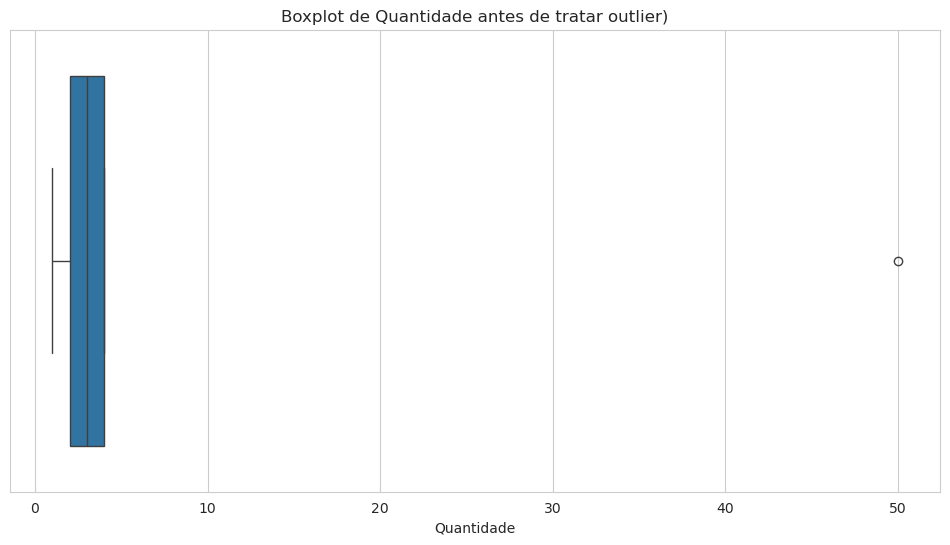

In [21]:
# --- 4. Tratando Outliers ---
print("Tratando outliers...")
sns.boxplot(x = dataset_limpo['Quantidade'])
plt.title('Boxplot de Quantidade antes de tratar outlier)')
plt.show()

In [22]:
# Removendo valores de 'Quantidade' que estão muito distantes da média.
# A abordagem comum e utilizada foi remover valores que estão além de 3 desvios padrão da média.
limite_superior = dataset_limpo['Quantidade'].mean() + 3 * dataset_limpo['Quantidade'].std()
dataset_limpo = dataset_limpo[dataset_limpo['Quantidade'] < limite_superior]

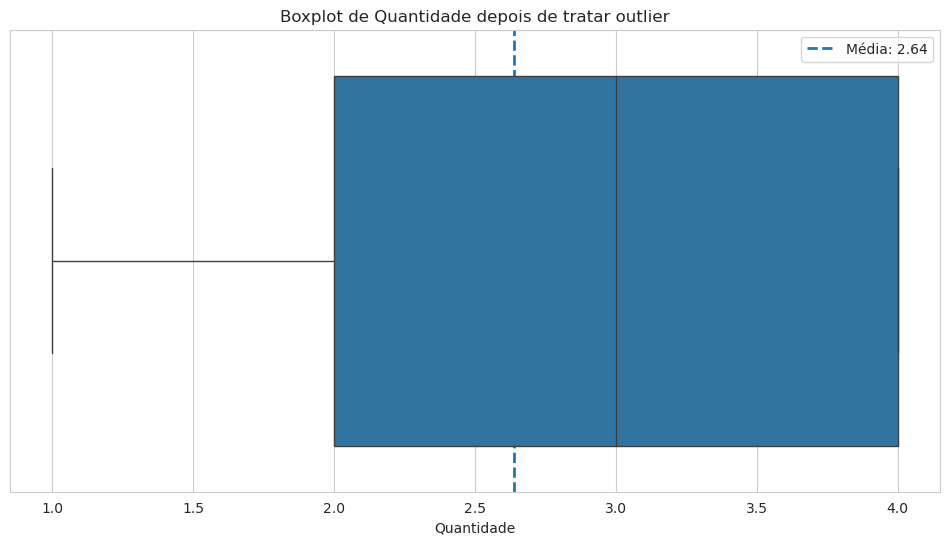

In [23]:
# Verificando o resultado
media = dataset_limpo['Quantidade'].mean()

plt.axvline(
    media,
    linestyle = '--',
    linewidth = 2,
    label = f"Média: {media:.2f}"
)

sns.boxplot(x = dataset_limpo['Quantidade'])
plt.title('Boxplot de Quantidade depois de tratar outlier')

plt.show()

In [24]:
# --- Verificação Final ---
print("\n--- Verificação  Final Pós-Limpeza ---\n")
dataset_limpo.info()
print("\nValores ausentes restantes:\n", dataset_limpo.isna().sum())
print(f"\nLinhas duplicadas restantes: {dataset_limpo.duplicated().sum()}")


--- Verificação  Final Pós-Limpeza ---

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 0 to 99
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       97 non-null     int64         
 1   Data_Compra     97 non-null     datetime64[ns]
 2   Cliente_ID      97 non-null     Int64         
 3   Produto         97 non-null     object        
 4   Categoria       97 non-null     object        
 5   Quantidade      97 non-null     float64       
 6   Preco_Unitario  97 non-null     float64       
 7   Status_Entrega  97 non-null     object        
dtypes: Int64(1), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.9+ KB

Valores ausentes restantes:
 ID_Pedido         0
Data_Compra       0
Cliente_ID        0
Produto           0
Categoria         0
Quantidade        0
Preco_Unitario    0
Status_Entrega    0
dtype: int64

Linhas duplicadas restantes: 0


## Passo 4 - Engenharia de Atributos e Extração de Insights
Com os dados limpos, começa a fazer perguntas e extração de insights.

In [25]:
dataset_limpo.head()

,ID_Pedido,Data_Compra,Cliente_ID,Produto,Categoria,Quantidade,Preco_Unitario,Status_Entrega
0,1001,2026-06-25,109,Smartwatch,Eletrônicos,1.0,5999.9,Cancelado
1,1002,2026-06-13,135,Smartwatch,Eletrônicos,3.0,8500.0,Entregue
2,1003,2026-06-05,113,Smartwatch,Acessórios,3.0,799.5,Entregue
3,1004,2026-06-20,130,Smartwatch,Acessórios,4.0,2100.0,Entregue
4,1005,2026-06-25,147,Smartwatch,Acessórios,4.0,850.0,Cancelado


In [26]:
# --- Feature Engineering: Criando uma nova coluna 'Total_Venda' ---
dataset_limpo['Total_Venda'] = dataset_limpo['Quantidade'] * dataset_limpo['Preco_Unitario']

In [27]:
dataset_limpo.head()

,ID_Pedido,Data_Compra,Cliente_ID,Produto,Categoria,Quantidade,Preco_Unitario,Status_Entrega,Total_Venda
0,1001,2026-06-25,109,Smartwatch,Eletrônicos,1.0,5999.9,Cancelado,5999.9
1,1002,2026-06-13,135,Smartwatch,Eletrônicos,3.0,8500.0,Entregue,25500.0
2,1003,2026-06-05,113,Smartwatch,Acessórios,3.0,799.5,Entregue,2398.5
3,1004,2026-06-20,130,Smartwatch,Acessórios,4.0,2100.0,Entregue,8400.0
4,1005,2026-06-25,147,Smartwatch,Acessórios,4.0,850.0,Cancelado,3400.0


In [28]:
# 1. Qual o total de receita?
receita_total = dataset_limpo['Total_Venda'].sum()
print(f"A receita total da loja foi de: R$ {receita_total:,.2f}")

A receita total da loja foi de: R$ 928,869.00


In [29]:
# 2. Qual a receita total por categoria de produto?
receita_por_categoria = dataset_limpo.groupby('Categoria')['Total_Venda'].sum().sort_values(ascending = False)
print("\n--- Receita Total por Categoria ---\n")
print(receita_por_categoria)


--- Receita Total por Categoria ---

Categoria
Eletrônicos    733495.0
Acessórios     195374.0
Name: Total_Venda, dtype: float64


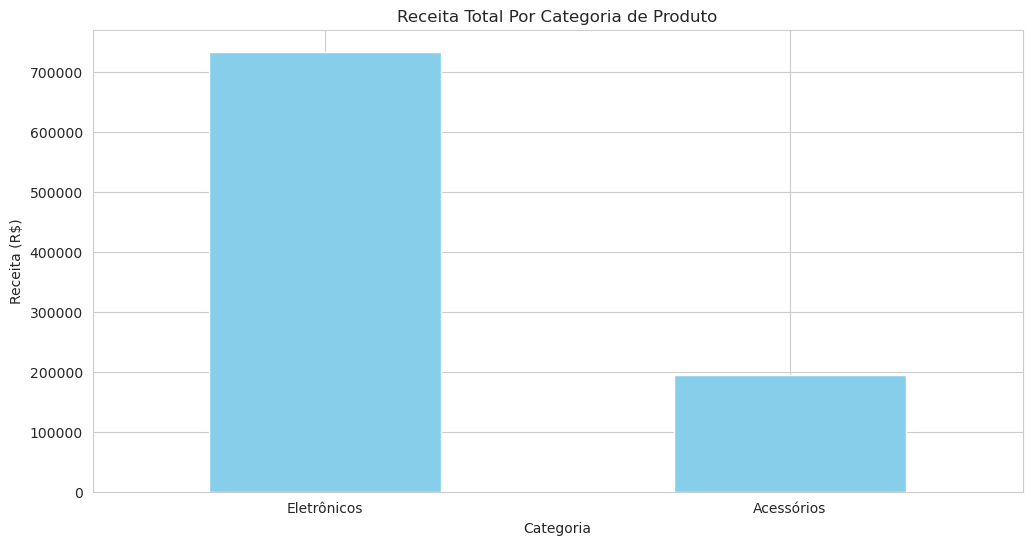

In [30]:
# Receita por Categoria
receita_por_categoria.plot(kind = 'bar', color = 'skyblue')
plt.title('Receita Total Por Categoria de Produto')
plt.ylabel('Receita (R$)')
plt.xlabel('Categoria')
plt.xticks(rotation = 0)

plt.show()

In [31]:
# 3. Qual o produto mais vendido em quantidade?
produto_mais_vendido = dataset_limpo.groupby('Produto')['Quantidade'].sum().sort_values(ascending = False)
print("\n--- Total de Unidades Vendidas por Produto ---\n")
print(produto_mais_vendido)


--- Total de Unidades Vendidas por Produto ---

Produto
Smartphone          84.0
Fone de Ouvido      61.0
Smartwatch          59.0
Notebook            32.0
Teclado Mecânico    20.0
Name: Quantidade, dtype: float64


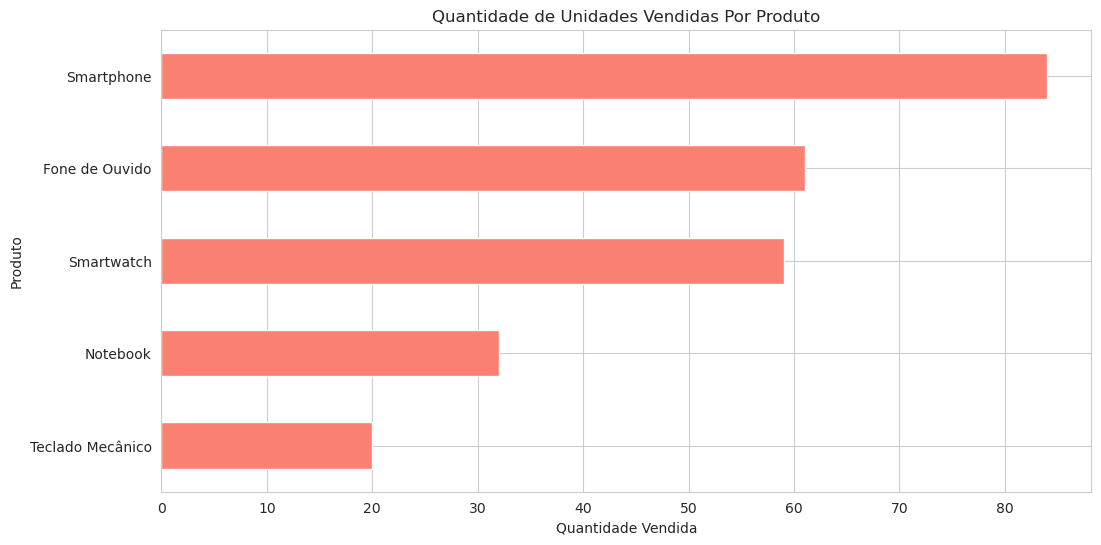

In [32]:
# Quantidade Vendida por Produto
produto_mais_vendido.plot(kind = 'barh', color = 'salmon')
plt.title('Quantidade de Unidades Vendidas Por Produto')
plt.ylabel('Produto')
plt.xlabel('Quantidade Vendida')
plt.gca().invert_yaxis() # Inverte o eixo para o maior valor ficar no topo

plt.show()

In [33]:
# 4. Análise de vendas ao longo do tempo
# Agrupando as vendas por dia
vendas_por_dia = dataset_limpo.set_index('Data_Compra').resample('D')['Total_Venda'].sum()
print("\n--- Resumo de Vendas por Dia (Primeiros 5 dias) ---\n")
print(vendas_por_dia.head())


--- Resumo de Vendas por Dia (Primeiros 5 dias) ---

Data_Compra
2026-06-05     2398.5
2026-06-06        0.0
2026-06-07        0.0
2026-06-08        0.0
2026-06-09    25500.0
Freq: D, Name: Total_Venda, dtype: float64


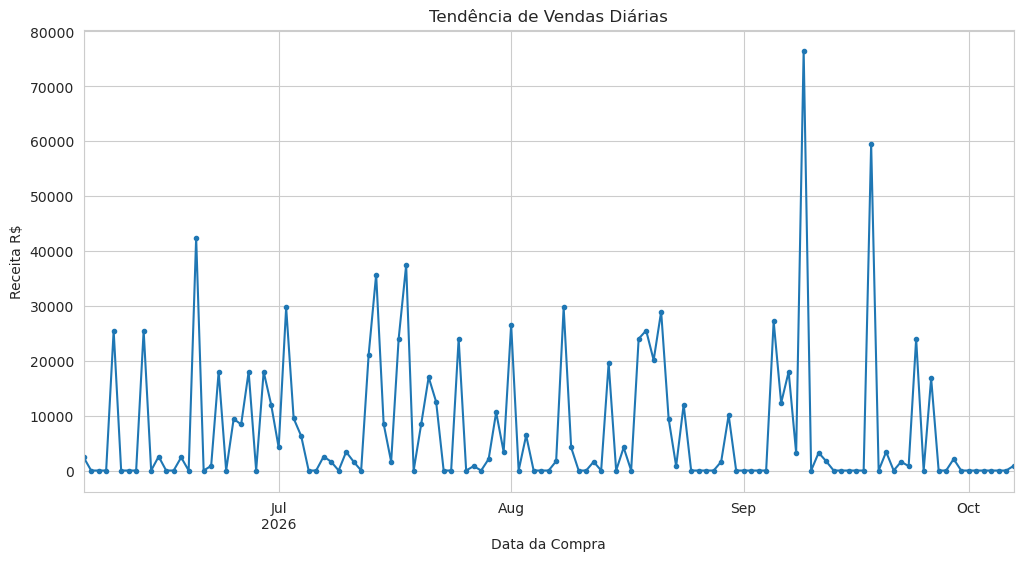

In [35]:
# Vendas ao Longo do Tempo
vendas_por_dia.plot(kind = 'line', marker = '.', linestyle = '-')
plt.title('Tendência de Vendas Diárias')
plt.ylabel('Receita R$')
plt.xlabel('Data da Compra')
plt.grid(True)

plt.show()

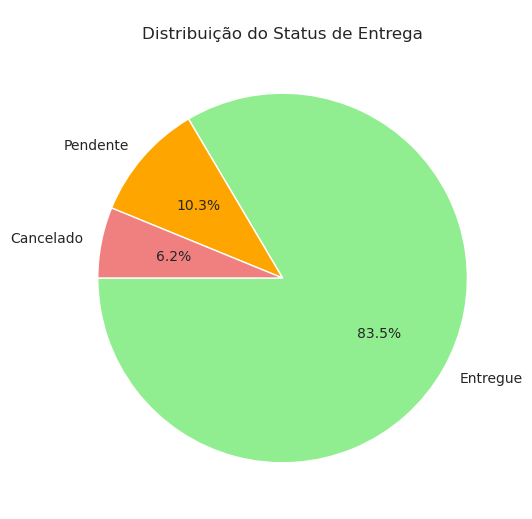

In [39]:
# Gráfico: Distribuição do Status de Entrega

status_counts = dataset_limpo['Status_Entrega'].value_counts()

plt.pie(
    status_counts,                 # Valores numéricos para cada fatia (quantidade de cada status)
    labels = status_counts.index,  # Rótulos de cada fatia (labels dos status)
    autopct = '%1.1f%%',           # Mostra o percentual em cada fatia com 1 casa decimal
    startangle = 180,              # Ângulo inicial para "girar" o gráfico e escolher onde começa a primeira fatia
    colors = ['lightgreen',
              'orange',
              'lightcoral']
)

plt.title('\nDistribuição do Status de Entrega')
plt.show()